In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Zad
Wygenerujmy punkty w kształcie prostej: $y = 4 + 3x + \text{szum}$.

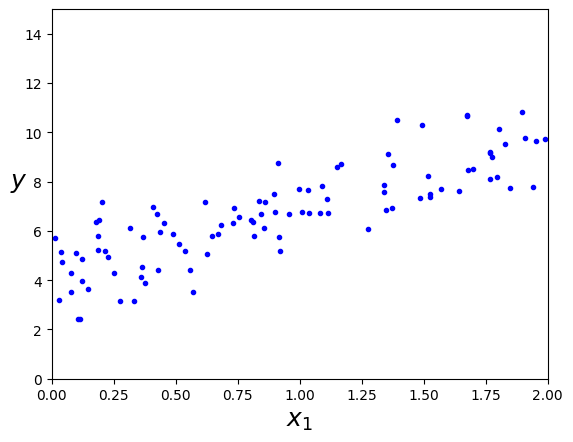

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.21566956],
       [2.74512319]])

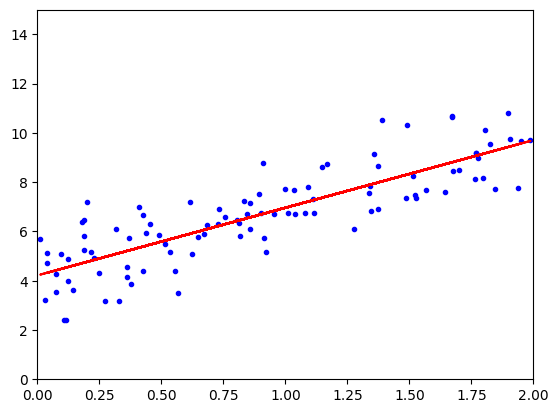

In [4]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.plot(X, X_b.dot(theta_best), "r-")
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
pd.DataFrame([lin_reg.intercept_, *lin_reg.coef_])

,0
0,4.215670
1,2.745123


# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [6]:
theta_0 = np.random.randn(2,1)  # random initialization

In [7]:
learning_rate = 0.1  
n_iterations = 1000
m = len(X_b)
theta_path_bgd = []

theta = theta_0

for _ in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    theta_path_bgd.append(theta)

In [8]:
theta

array([[4.21566956],
       [2.74512319]])

# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [9]:
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
theta_path_sgd = []

theta = theta_0

for _ in range(n_iterations):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - learning_rate * gradients
    theta_path_sgd.append(theta)

In [10]:
theta

array([[3.45001775],
       [2.4587352 ]])

# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [11]:
learning_rate = 0.1
n_iterations = 1000
batch_size = 20
m = len(X_b)
theta_path_mbgd = []

theta = theta_0

for _ in range(n_iterations):
    shuffled_indices = np.random.permutation(m)[0:batch_size]
    xi = X_b[shuffled_indices]
    yi = y[shuffled_indices]
    gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - learning_rate * gradients
    theta_path_mbgd.append(theta)

In [12]:
print(theta)

[[4.22551356]
 [2.71160798]]


# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [13]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mbgd)

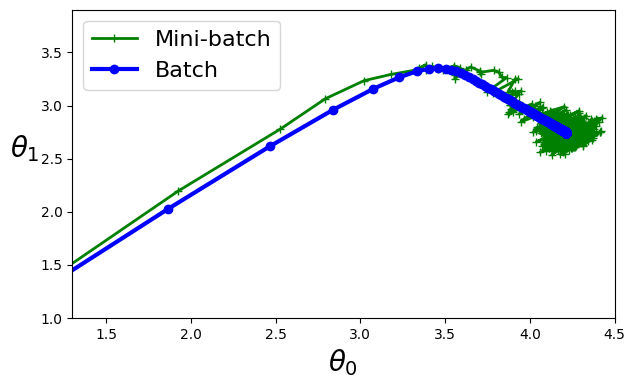

In [14]:
plt.figure(figsize=(7,4))
# plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([1.3, 4.5, 1, 3.9])
plt.show()